In [1]:
import pandas as pd
import great_expectations as ge
import seaborn as sns
import sys

In [2]:
config = pd.read_csv('../bucket/config/config.csv',index_col=0)

In [3]:
sys.path.insert(1,'../src')
import general_tools as gt
import data_quality_monitoring

In [4]:
dataset_path=config.loc['iphone6_data_post_etl_and_featureEng'][0]
embeddings_without_ChatGPT_path=config.loc['iphone6_embeddings_dataset_without_ChatGPT'][0]
ChatGPT_opinion_path=config.loc['iphone6_ChatGPT_opinion'][0]
embeddings_with_ChatGPT_path=config.loc['iphone6_embeddings_with_ChatGPT'][0]
embeddings_only_ChatGPT_path=config.loc['iphone6_embeddings_only_ChatGPT_path'][0]

In [5]:
dataset= ge.read_csv(config.loc['iphone6_data_post_etl_and_featureEng'][0])
dataset_embeddings=ge.read_csv(config.loc['iphone6_embeddings_dataset_without_ChatGPT'][0],index_col=0)
y_train_labled=ge.read_csv(config.loc['iphone6_y_train_labled'][0])
y_test=ge.read_csv(config.loc['iphone6_y_test'][0])

In [6]:
y_train_labled.head()

,label
0,0
1,1
2,0
3,0
4,1


In [7]:
dataset_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
0,-0.016800,-0.004732,-0.039901,-0.012692,-0.000128,0.003040,-0.042852,-0.023569,-0.005495,-0.025995,...,0.013629,-0.020447,0.025016,-0.011976,-0.036325,0.002934,0.002153,-0.005147,0.008819,-0.048670
1,-0.028543,-0.001629,0.013818,-0.031556,-0.004489,0.029129,-0.030915,-0.001333,-0.009793,-0.023646,...,0.014069,-0.044224,0.018568,-0.015067,-0.041685,0.028599,-0.016755,-0.008391,0.004966,-0.011119
2,-0.006061,0.003205,0.015924,-0.012826,-0.003200,0.009321,-0.011763,-0.018106,-0.001811,-0.021809,...,0.007293,-0.018641,0.015896,-0.019387,-0.035480,0.021260,0.005051,-0.034804,-0.000608,-0.002140
3,-0.025216,0.013038,-0.005592,-0.016252,-0.002357,0.011149,-0.011354,0.004761,-0.015448,-0.018507,...,-0.002668,-0.028176,0.047416,-0.018126,-0.019282,0.025315,-0.024173,-0.000293,0.013743,-0.036788
4,-0.003809,0.001578,0.009550,-0.038409,-0.002101,0.009905,-0.016753,-0.000690,-0.002849,-0.014934,...,0.005345,-0.014407,0.034507,-0.032873,-0.023330,-0.002677,-0.003559,-0.006712,0.008502,-0.002129


In [8]:
dataset.expect_column_distinct_values_to_be_in_set('has_url',value_set=[0,1]).success and\
dataset.expect_column_min_to_be_between('tweet_count_perID_fromStart',strict_min=1).success and\
dataset.expect_column_values_to_be_of_type('name',type_='str').success and\
dataset.expect_column_values_to_be_of_type('id',type_='str').success and\
dataset.expect_column_values_to_be_of_type('text',type_='str').success and\
dataset.expect_column_values_to_be_of_type('has_url',type_='int').success and\
dataset.expect_column_values_to_be_of_type('tweet_count_perID_fromStart',type_='int').success

True

In [9]:
column0_type_validation=dataset_embeddings.expect_column_values_to_be_of_type('0',type_='float').success
for i in range(1,1536):
    matched=column0_type_validation and dataset_embeddings.expect_column_values_to_be_of_type(\
        f'{str(i)}',type_='float').success
    if matched:
        multi_column_type_validation=matched
    else:
        multi_column_type_validation=matched
        break  
dataset_embeddings.expect_table_column_count_to_equal(1536).success and\
multi_column_type_validation

True

In [7]:
data_quality_monitoring.check_data_post_etl_and_featureEng()

True

In [8]:
data_quality_monitoring.check_chatGPT_opinion()

True

In [9]:
# data_quality_monitoring.check_embeddings_dataset(embeddings_without_ChatGPT_path)

True

In [10]:
# data_quality_monitoring.check_embeddings_dataset(embeddings_with_ChatGPT_path)

True

In [11]:
# data_quality_monitoring.check_embeddings_dataset(embeddings_only_ChatGPT_path)

True

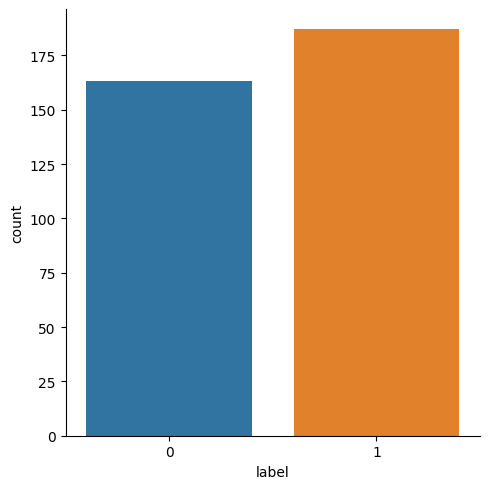

In [10]:
sns.catplot(x='label',kind='count',data=y_train_labled) # label 1 is product feedback and 0 is not.

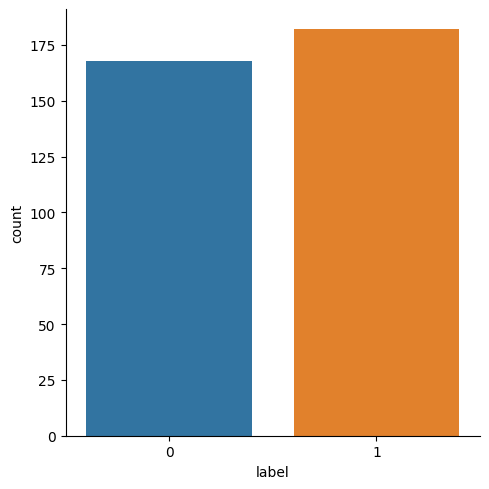

In [11]:
sns.catplot(x='label',kind='count',data=y_test)